Для таблично заданной функции путём решения нормальной системы МнК найти приближающие многочлены первой, второй и третьей степеней и построить их графики.

x = [-1, 0, 1, 2, 3, 4]  
y = [0.86603, 1, 0.86603, 0.5, 0, -0.5]

In [86]:
import numpy as np 
import matplotlib.pyplot as plt
from math import pi, cos


x = np.array([-1, 0, 1, 2, 3, 4], dtype = float) 
y = np.array([0.86603, 1, 0.86603, 0.5, 0, -0.5], dtype = float)


def Gauss(A):
    m = len(A)
    assert all([len(row) == m + 1 for row in A[1:]]), "Матрица не является квадратной"
    n = m + 1
    
    for k in range(m):
        pivots = [abs(A[i][k]) for i in range(k, m)]
        i_max = pivots.index(max(pivots)) + k
        assert A[i_max][k] != 0, "Ошибка"
        A[k], A[i_max] = A[i_max], A[k]
        for i in range(k + 1, m):
            f = A[i][k] / A[k][k]
            for j in range(k + 1, n):
                A[i][j] -= A[k][j] * f
            A[i][k] = 0       
    x = []
    for i in range(m - 1, -1, -1):
        x.insert(0, A[i][m] / A[i][i])
        for k in range(i - 1, -1, -1):
            A[k][m] -= A[k][i] * x[0]
    return x

def Poly_value(x, coef):
    summa = 0
    for i in range(len(coef)):
        summa += coef[i]*x**i
    return summa

def Print_poly(coef):
    n = len(coef)
    print("Многочлен степени {} имеет вид:".format(n-1), end=' ')
    for i in range(n):
        if i == 0:
            print(coef[i], end=' ')
        else:
            if coef[i] >= 0:
                print('+ ' + str(coef[i]) + '*x**' + str(i))
            else:
                print('- ' + str(abs(coef[i])) + '*x**' + str(i))

def Make_normal_system(poly_degree, x):
    matrix = []
    N = len(x) - 1
    for k in range(poly_degree + 1):
        matrix.append([])
        sum2 = 0
        for i in range(poly_degree + 1):
            sum1 = 0
            for j in range(N + 1):
                sum1 += x[j]**(k + i)
            matrix[k].append(sum1)
        for j in range(N + 1):
            sum2 += y[j]*x[j]**k
        matrix[k].append(sum2)
    return matrix




Многочлен степени 1 имеет вид: 0.8923224761904763 - 0.2913194285714286*x**1
При x = -1.0 y = 0.86603 значение многочлена = 1.183641904761905 Погрешность:  0.31761190476190493
При x = 0.0 y = 1.0 значение многочлена = 0.8923224761904763 Погрешность:  0.10767752380952367
При x = 1.0 y = 0.86603 значение многочлена = 0.6010030476190478 Погрешность:  0.2650269523809522
При x = 2.0 y = 0.5 значение многочлена = 0.3096836190476191 Погрешность:  0.1903163809523809
При x = 3.0 y = 0.0 значение многочлена = 0.018364190476190534 Погрешность:  0.018364190476190534
При x = 4.0 y = -0.5 значение многочлена = -0.27295523809523814 Погрешность:  0.22704476190476186
При x = -1.0 значение стандартной функции косинуса равно 0.8660254037844387
При x = 0.0 значение стандартной функции косинуса равно 1.0
При x = 1.0 значение стандартной функции косинуса равно 0.8660254037844387
При x = 2.0 значение стандартной функции косинуса равно 0.5000000000000001
При x = 3.0 значение стандартной функции косинуса равно 

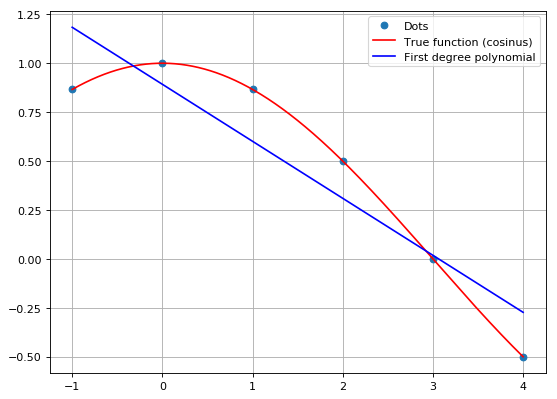

In [87]:
poly_degree = 1
matrix = Make_normal_system(poly_degree, x)
coef = Gauss(matrix)
Print_poly(coef)
  
for i in range(N+1):
    print('При x =', x[i], 'y =', y[i], 'значение многочлена =', Poly_value(x[i], coef), 
          'Погрешность: ', abs(y[i]-Poly_value(x[i], coef)))

for i in range(N+1):
    print('При x =', x[i], 'значение стандартной функции косинуса равно', cos(x[i]*pi/6)) 
    
    
x_arr = np.linspace(x[0], x[5], 1000)
y_true = [cos(i*pi/6) for i in x_arr]
y_lest_sq = [Poly_value(t, coef) for t in x_arr]

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o', x_arr, y_true, 'r', x_arr, y_lest_sq, 'b')
plt.legend(("Dots", "True function (cosinus)", "First degree polynomial"))
plt.grid(True)
plt.show()    

Многочлен степени 2 имеет вид: 0.9474887857142859 - 0.04307103571428596*x**1
- 0.08274946428571422*x**2
При x = -1.0 y = 0.86603 значение многочлена = 0.9078103571428575 Погрешность:  0.04178035714285755
При x = 0.0 y = 1.0 значение многочлена = 0.9474887857142859 Погрешность:  0.05251121428571415
При x = 1.0 y = 0.86603 значение многочлена = 0.8216682857142856 Погрешность:  0.04436171428571434
При x = 2.0 y = 0.5 значение многочлена = 0.5303488571428571 Погрешность:  0.030348857142857066
При x = 3.0 y = 0.0 значение многочлена = 0.07353049999999994 Погрешность:  0.07353049999999994
При x = 4.0 y = -0.5 значение многочлена = -0.5487867857142856 Погрешность:  0.04878678571428563
При x = -1.0 значение стандартной функции косинуса равно 0.8660254037844387
При x = 0.0 значение стандартной функции косинуса равно 1.0
При x = 1.0 значение стандартной функции косинуса равно 0.8660254037844387
При x = 2.0 значение стандартной функции косинуса равно 0.5000000000000001
При x = 3.0 значение станда

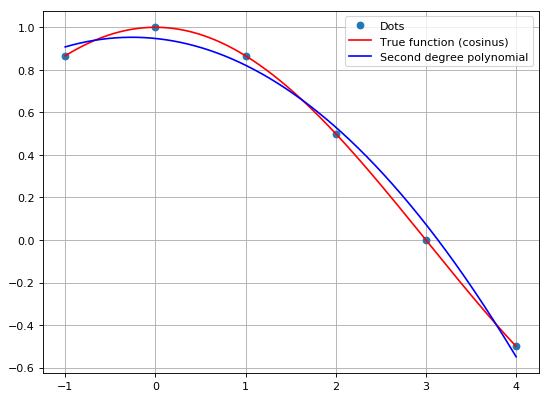

In [88]:
poly_degree = 2
matrix = Make_normal_system(poly_degree, x)
coef = gauss(matrix)
Print_poly(coef)

for i in range(N+1):
    print('При x =', x[i], 'y =', y[i], 'значение многочлена =', Poly_value(x[i], coef), 
          'Погрешность: ', abs(y[i]-Poly_value(x[i], coef)))

for i in range(N+1):
    print('При x =', x[i], 'значение стандартной функции косинуса равно', cos(x[i]*pi/6)) 
    
x_arr = np.linspace(x[0], x[5], 1000)
y_true = [cos(i*pi/6) for i in x_arr]
y_lest_sq = [Poly_value(t, coef) for t in x_arr]

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o', x_arr, y_true, 'r', x_arr, y_lest_sq, 'b')
plt.legend(("Dots", "True function (cosinus)", "Second degree polynomial"))
plt.grid(True)
plt.show()    

Многочлен степени 3 имеет вид: 1.0110320634920644 - 0.017351137566136703*x**1
- 0.15083154761904907*x**2
+ 0.015129351851852154*x**3
При x = -1.0 y = 0.86603 значение многочлена = 0.8624223015872998 Погрешность:  0.0036076984127001444
При x = 0.0 y = 1.0 значение многочлена = 1.0110320634920644 Погрешность:  0.011032063492064426
При x = 1.0 y = 0.86603 значение многочлена = 0.8579787301587308 Погрешность:  0.008051269841269137
При x = 2.0 y = 0.5 значение многочлена = 0.494038412698412 Погрешность:  0.005961587301588023
При x = 3.0 y = 0.0 значение многочлена = 0.009987222222220704 Погрешность:  0.009987222222220704
При x = 4.0 y = -0.5 значение многочлена = -0.5033987301587297 Погрешность:  0.0033987301587297125
При x = -1.0 значение стандартной функции косинуса равно 0.8660254037844387
При x = 0.0 значение стандартной функции косинуса равно 1.0
При x = 1.0 значение стандартной функции косинуса равно 0.8660254037844387
При x = 2.0 значение стандартной функции косинуса равно 0.50000000

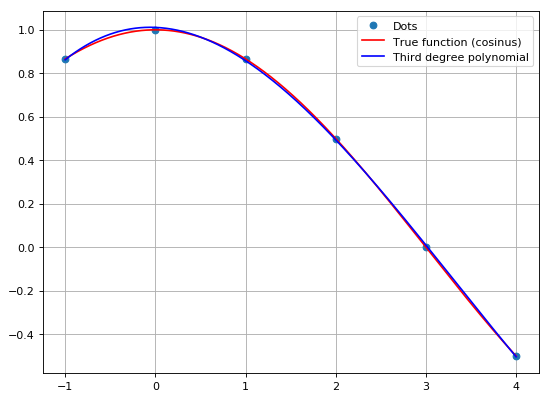

In [89]:
poly_degree = 3
matrix = Make_normal_system(poly_degree, x)
coef = gauss(matrix)
Print_poly(coef)

for i in range(N+1):
    print('При x =', x[i], 'y =', y[i], 'значение многочлена =', Poly_value(x[i], coef), 
          'Погрешность: ', abs(y[i]-Poly_value(x[i], coef)))

for i in range(N+1):
    print('При x =', x[i], 'значение стандартной функции косинуса равно', cos(x[i]*pi/6)) 
    
x_arr = np.linspace(x[0], x[5], 1000)
y_true = [cos(i*pi/6) for i in x_arr]
y_lest_sq = [Poly_value(t, coef) for t in x_arr]

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o', x_arr, y_true, 'r', x_arr, y_lest_sq, 'b')
plt.legend(("Dots", "True function (cosinus)", "Third degree polynomial"))
plt.grid(True)
plt.show()    